### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets better or worse. 

### Clustering with California Housing Dataset
- This homework based on [this blog](https://dev.to/travelleroncode/analyzing-a-dataset-with-unsupervised-learning-31ld).
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [60]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool

In [61]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [62]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [63]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [64]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


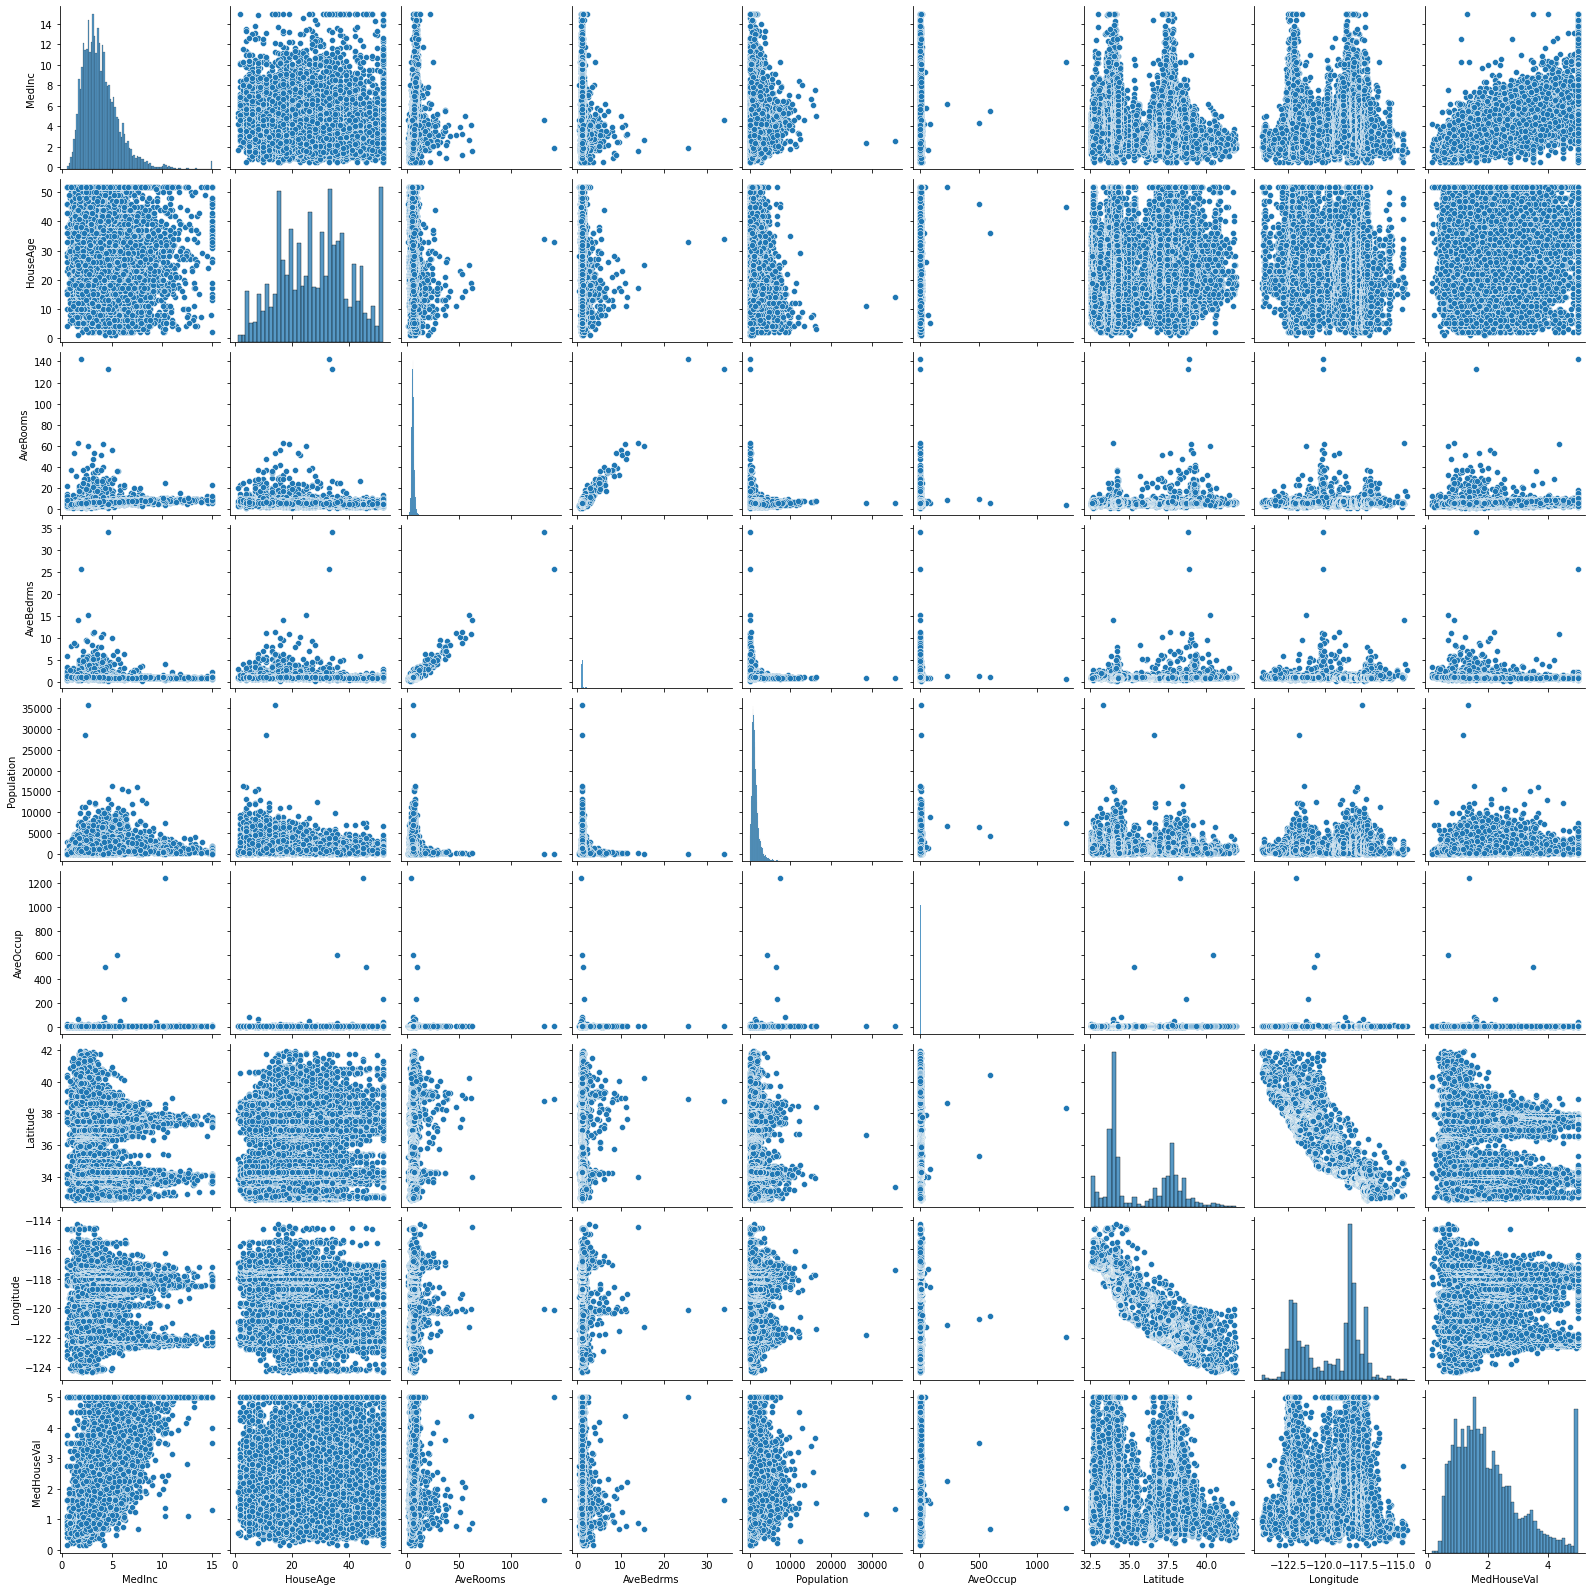

In [65]:
sns.pairplot(data = housing_df)

<AxesSubplot:>

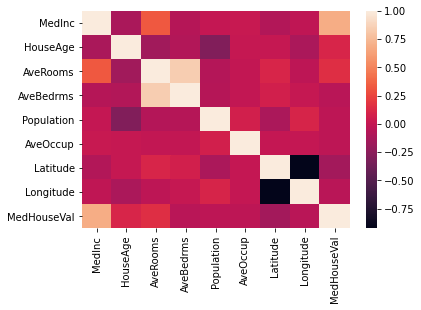

In [66]:
sns.heatmap(housing_df.corr(),)

### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

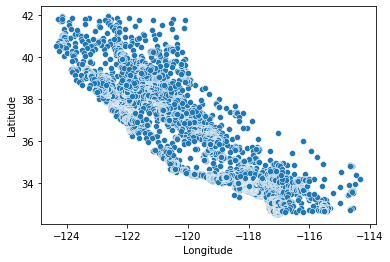

In [67]:
import seaborn as sns
sns.scatterplot(x='Longitude', y='Latitude',data=housing_df)

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [68]:
lat_lon_df = housing_df[['Latitude','Longitude']]

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=2)

In [71]:
kmeans.fit(lat_lon_df)

KMeans(n_clusters=2)

In [72]:
kmeans.predict(lat_lon_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [73]:
kmeans.cluster_centers_

array([[  37.95713201, -121.7178467 ],
       [  33.94126851, -118.00789306]])

In [74]:
reg2 = list(kmeans.labels_)
set(kmeans.labels_)

{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/clust2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [43]:
lat_lon_df['reg2'] = reg2

<ipython-input-43-049b9264a81b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon_df['reg2'] = reg2


In [44]:
lat_lon_df.head()

,Latitude,Longitude,reg2
0,37.88,-122.23,0
1,37.86,-122.22,0
2,37.85,-122.24,0
3,37.85,-122.25,0
4,37.85,-122.25,0


In [45]:
centroids = kmeans.cluster_centers_
centroids

array([[  37.99626294, -121.75897813,    1.17968015],
       [  33.97506592, -118.03562541,    1.71448583]])

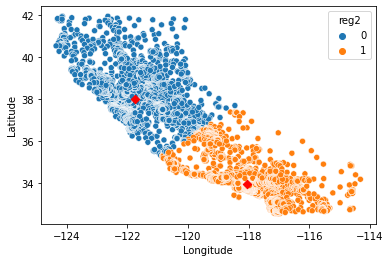

In [46]:
sns.scatterplot(x='Longitude',y='Latitude',data=lat_lon_df,hue='reg2')
plt.scatter(x=centroids[:,1], y=centroids[:,0], color='r',marker='D')

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [18]:
housing_df['reg2'] = lat_lon_df['reg2']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,reg2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

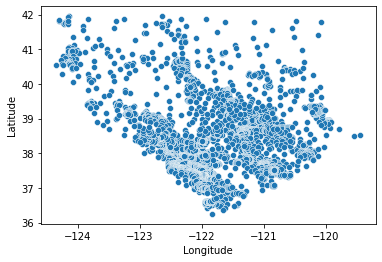

In [19]:
so_cal_df = housing_df[housing_df['reg2']==1]

sns.scatterplot(x=so_cal_df['Longitude'],y=so_cal_df['Latitude'],data=so_cal_df)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

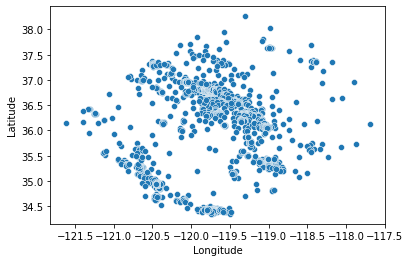

In [20]:
no_cal_df = housing_df[housing_df['reg2']==0]

sns.scatterplot(x=no_cal_df['Longitude'],y=no_cal_df['Latitude'],data=no_cal_df)

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [21]:
print(no_cal_df['MedHouseVal'].median())
print(so_cal_df['MedHouseVal'].median())

0.8855
1.7995


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [22]:
X= np.array(so_cal_df['MedHouseVal']).reshape(-1,1)

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
kmeans.predict(X)

hi_med_lo = kmeans.labels_

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

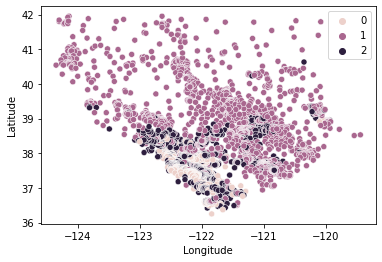

In [23]:
sns.scatterplot(x='Longitude',y='Latitude',data=so_cal_df,hue=hi_med_lo)

In [24]:
so_cal_df['hi_med_lo'] = hi_med_lo

<ipython-input-24-8c6bada43c5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_cal_df['hi_med_lo'] = hi_med_lo


In [25]:
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==2].median()}")

Clust 0 median house value: 4.113
Clust 1 median house value: 1.1355
Clust 2 median house value: 2.4185


In [26]:
orig_df = housing_df.drop(columns=['reg2'])

In [27]:
orig_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

In [28]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(orig_df)
kmeans.predict(orig_df)
labels = kmeans.labels_

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

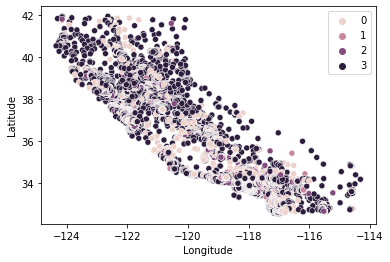

In [29]:
sns.scatterplot(x='Longitude',y='Latitude',data=orig_df,hue=labels)

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
